<a href="https://colab.research.google.com/github/danielbrioli/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def mvs(num_set):
  num_count = 0
  num_sum = 0
  var = 0
  for value in num_set:
    num_sum = num_sum + value
    num_count = num_count + 1
  mean = num_sum / num_count
  for value in num_set:
    var = var + (value - mean)**2
  var = var / (num_count - 1)
  std = var**0.5
  return mean, var, std

In [4]:
test_list = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print(mvs(test_list))

(3052.714285714286, 214387.90476190473, 463.0204150595357)


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [7]:
test_list2 = [127, 80, 105, 92, 120, 115, 93]

import numpy as np

test_cov = np.cov(test_list, test_list2)

print(test_cov) # The covariance is 7604.3571~

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]
7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [9]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]
sal_mean, sal_var, sal_std = mvs(sales)
cus_mean, cus_var, cus_std = mvs(customers)

cor_co = test_cov[0][1] / (sal_std * cus_std)

print(cor_co)
print(np.corrcoef(sales, customers)) # testing with library function

0.9628339778148909
[[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [20]:
import pandas as pd

titanic_df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")

titanic_num_df = titanic_df.select_dtypes(include='number')

varcov = titanic_num_df.cov()
corrco = titanic_num_df.corr()

print(varcov)
print(corrco)

                     Unnamed: 0      pclass  ...         body  has_cabin_number
Unnamed: 0        143117.500000  284.357034  ...   591.579132        -95.438885
pclass               284.357034    0.701969  ...    -2.876653         -0.249992
survived             -53.967125   -0.127248  ...     0.000000          0.061406
age                -1442.939812   -3.954605  ...    81.622922          1.463138
sibsp                 25.828746    0.053090  ...    -8.708471         -0.003946
parch                  1.172783    0.013287  ...     4.237190          0.013316
fare               -9410.735123  -24.227788  ...  -179.164684         10.976961
body                 591.579132   -2.876653  ...  9544.688567          3.625689
has_cabin_number     -95.438885   -0.249992  ...     3.625689          0.174613

[9 rows x 9 columns]
                  Unnamed: 0    pclass  ...      body  has_cabin_number
Unnamed: 0          1.000000  0.897822  ...  0.015558         -0.603727
pclass              0.897822  1.00

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

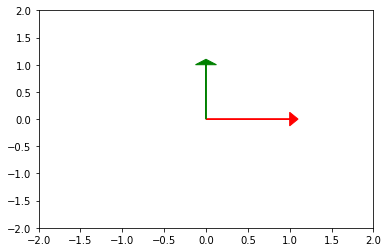

0


In [22]:
import matplotlib.pyplot as plt

v2_a = [1,0]
v2_b = [0,1]

plt.xlim(right=2, left=-2)
plt.ylim(top=2, bottom=-2)
plt.arrow(0, 0, v2_a[0], v2_a[1], head_width=.25, head_length=0.1, color = 'red')
plt.arrow(0, 0, v2_b[0], v2_b[1], head_width=.25, head_length=0.1, color = 'green')
plt.show()

print(np.dot(v2_a, v2_b))

# A synonym for orthogonal in this case is "perpendicular"

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [21]:
v3_a = [-5, 3, 7]
v3_b = [6, -8, 2]

print(np.dot(v3_a, v3_b))

# These vectors are not orthogonal because their dot product does not equal 0.

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [29]:
v4_c = [2, -15, 6, 20]
v4_c2 = [[2],[-15],[6],[20]] # I guess I should have just used v4_c.T but w/e

print(np.linalg.norm(v4_c)**2) # The norm
print(np.dot(v4_c, v4_c))      # The dot product with itself
print(np.matmul(v4_c, v4_c2))  # Its transform times itself

# They're all equal as per the end of the lecture notebook.

665.0
665
[665]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 * \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}
\begin{align}
\qquad
\end{align}
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2 * \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + (-8) * \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [32]:
v5_f = [4, 12, 11, 9, 2]

v5_f_norm = np.linalg.norm(v5_f)

v5_f_hat = np.divide(v5_f, v5_f_norm)

print(v5_f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

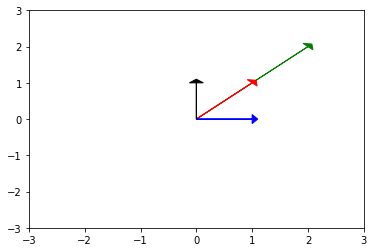

In [33]:
v2_1 = [1,1]
v2_2 = [2,2]

v2_3 = [1,0]
v2_4 = [0,1]

plt.xlim(right=3, left=-3)
plt.ylim(top=3, bottom=-3)
plt.arrow(0, 0, v2_2[0], v2_2[1], head_width=.25, head_length=0.1, color = 'green')
plt.arrow(0, 0, v2_1[0], v2_1[1], head_width=.25, head_length=0.1, color = 'red')
plt.arrow(0, 0, v2_3[0], v2_3[1], head_width=.25, head_length=0.1, color = 'blue')
plt.arrow(0, 0, v2_4[0], v2_4[1], head_width=.25, head_length=0.1, color = 'black')
plt.show()

# Red and green are linearly dependent. Blue and black are independent.

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# The span of g and h is only the line that they both lie on, since they are
# linearly dependent.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# I believe these are linearly independent and as such their span is all
# vectors in R3.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



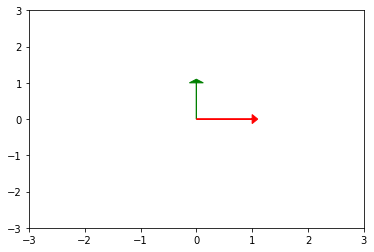

In [34]:
v2_5 = [0,1]
v2_6 = [1,0]

plt.xlim(right=3, left=-3)
plt.ylim(top=3, bottom=-3)
plt.arrow(0, 0, v2_5[0], v2_5[1], head_width=.25, head_length=0.1, color = 'green')
plt.arrow(0, 0, v2_6[0], v2_6[1], head_width=.25, head_length=0.1, color = 'red')
plt.show()

## 6.2 What does it mean to form a basis?

If a set of vectors form a basis for a vector space, it means that their combination spans the entire vector space, and that they are linearly independent.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [37]:
p = [[1,2,3],[-1,0,7],[4,8,2]]

print(np.linalg.matrix_rank(p))

3


## 7.2 What does the rank of a matrix tell us?

It is the dimension of the vector space spanned by the matrix's columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

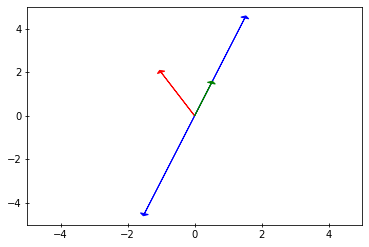

In [58]:
v2_v = np.array([1, 3])
v2_w = np.array([-1, 2])

v2_v_norm = np.linalg.norm(v2_v)

proj = (np.dot(v2_w, v2_v)/v2_v_norm**2)*v2_v

#above is getting close-ish but I am not sure how to get it the rest of the way
#right at the moment

plt.xlim(right=5, left=-5)
plt.ylim(top=5, bottom=-5)
plt.tick_params(axis='both',which='both',direction='inout')
plt.arrow(0, 0, 1.5, 4.5, head_width=.25, head_length=0.1, color = 'blue')
plt.arrow(0, 0, -1.5, -4.5, head_width=.25, head_length=0.1, color = 'blue')
plt.arrow(0, 0, v2_w[0], v2_w[1], head_width=.25, head_length=0.1, color = 'red')
plt.arrow(0, 0, proj[0], proj[1], head_width=.25, head_length=0.1, color = 'green')
plt.show()

#print(np.dot(v2_w, v2_v))
#print(proj_w_on_v)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

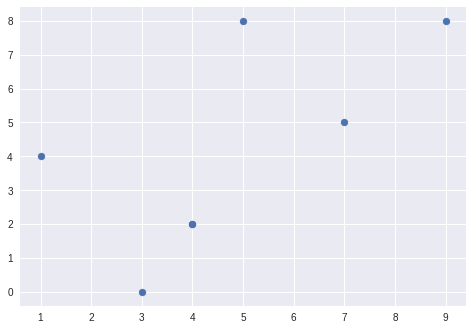

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()